In [1]:
# WeatherPy

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
citiesfile_data = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [4]:
#city_list = pd.DataFrame(cities)

#print(city_list)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
#params = {
#        "q" : city, 
#        "lat": lat,
#        "lon": lon,
#        "exclude": "current,minutely,hourly,daily",  
#        "appid": weather_api_key
#}

#response = request.get(url, params = params)

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}?q={city}&appid={weather_api_key}"
     city_url = f"{url}?q={city}&units=imperial&appid={weather_api_key}"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        response.raise_for_status() 
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except requests.exceptions.HTTPError as errh:
        print(f"HTTP Error: {errh}. Skipping... {city}")
        pass
    except Exception as e:
        print(f"An error occurred. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | san juan de miraflores
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | tangalle
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | verkhnevilyuysk
Processing Record 18 of Set 1 | nova olimpia
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22

Processing Record 21 of Set 4 | ahau
HTTP Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=ahau&appid=cd550ef055f82795d182f1a4205e017a. Skipping... ahau
Processing Record 22 of Set 4 | luderitz
Processing Record 23 of Set 4 | manuel ojinaga
HTTP Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=manuel%20ojinaga&appid=cd550ef055f82795d182f1a4205e017a. Skipping... manuel ojinaga
Processing Record 24 of Set 4 | lebu
Processing Record 25 of Set 4 | fort bragg
Processing Record 26 of Set 4 | banda aceh
Processing Record 27 of Set 4 | northam
Processing Record 28 of Set 4 | dudinka
Processing Record 29 of Set 4 | new norfolk
Processing Record 30 of Set 4 | pursat
Processing Record 31 of Set 4 | la'ie
Processing Record 32 of Set 4 | nagqu
Processing Record 33 of Set 4 | porto novo
Processing Record 34 of Set 4 | auki
Processing Record 35 of Set 4 | island harbour
Processing Record 36 of Set 4 | douentza
P

Processing Record 14 of Set 7 | happy valley-goose bay
Processing Record 15 of Set 7 | duobao
Processing Record 16 of Set 7 | serenje
Processing Record 17 of Set 7 | chonchi
Processing Record 18 of Set 7 | west island
Processing Record 19 of Set 7 | usinsk
Processing Record 20 of Set 7 | khandwa
Processing Record 21 of Set 7 | letterkenny
Processing Record 22 of Set 7 | cestos city
Processing Record 23 of Set 7 | prince george
Processing Record 24 of Set 7 | rogers park
Processing Record 25 of Set 7 | yung shue wan
Processing Record 26 of Set 7 | capitan bado
Processing Record 27 of Set 7 | carutapera
Processing Record 28 of Set 7 | puerto carreno
Processing Record 29 of Set 7 | khorixas
Processing Record 30 of Set 7 | daokou
Processing Record 31 of Set 7 | sterling
Processing Record 32 of Set 7 | sarina
Processing Record 33 of Set 7 | liepaja
Processing Record 34 of Set 7 | voranava
Processing Record 35 of Set 7 | taro
Processing Record 36 of Set 7 | minas de marcona
Processing Record

Processing Record 24 of Set 10 | east ballina
Processing Record 25 of Set 10 | pristen'
Processing Record 26 of Set 10 | tommot
Processing Record 27 of Set 10 | alofi
Processing Record 28 of Set 10 | klyuchi
Processing Record 29 of Set 10 | sheringham
Processing Record 30 of Set 10 | hammerfest
Processing Record 31 of Set 10 | bathsheba
Processing Record 32 of Set 10 | madang
Processing Record 33 of Set 10 | ishimbay
Processing Record 34 of Set 10 | dryden
Processing Record 35 of Set 10 | petrozavodsk
Processing Record 36 of Set 10 | tsiolkovskiy
HTTP Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=tsiolkovskiy&appid=cd550ef055f82795d182f1a4205e017a. Skipping... tsiolkovskiy
Processing Record 37 of Set 10 | ashburton
Processing Record 38 of Set 10 | queenstown
Processing Record 39 of Set 10 | hovd
Processing Record 40 of Set 10 | red lion
Processing Record 41 of Set 10 | dongola
Processing Record 42 of Set 10 | aykhal
Processing Record 43 o

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [12]:
# Display sample data
city_data_df.head(10)



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.30,94,100,12.74,TF,1703961313
1,san juan de miraflores,-12.1629,-76.9635,298.44,76,100,4.70,PE,1703961904
2,blackmans bay,-43.0167,147.3167,285.22,68,100,0.89,AU,1703961314
3,albany,42.6001,-73.9662,278.80,73,65,1.79,US,1703961331
4,ancud,-41.8697,-73.8203,289.93,65,35,2.46,CL,1703961456
5,puerto natales,-51.7236,-72.4875,293.40,37,40,10.29,CL,1703961318
6,waitangi,-43.9535,-176.5597,290.27,98,100,2.24,NZ,1703961331
7,tangalle,6.0240,80.7911,298.24,83,100,6.20,LK,1703961907
8,flying fish cove,-10.4217,105.6791,299.97,89,100,5.66,CX,1703961399
9,afaahiti,-17.7500,-149.2833,302.08,84,100,4.89,PF,1703961438


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.30,94,100,12.74,TF,1703961313
1,san juan de miraflores,-12.1629,-76.9635,298.44,76,100,4.70,PE,1703961904
2,blackmans bay,-43.0167,147.3167,285.22,68,100,0.89,AU,1703961314
3,albany,42.6001,-73.9662,278.80,73,65,1.79,US,1703961331
4,ancud,-41.8697,-73.8203,289.93,65,35,2.46,CL,1703961456


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

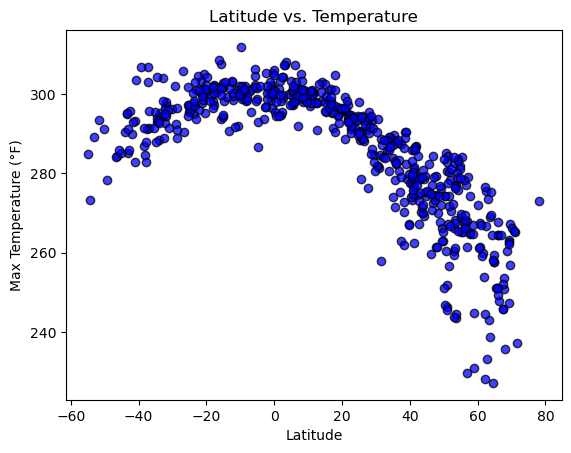

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],facecolors ="blue",edgecolor ="black", alpha=0.75 )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title("Latitude vs. Temperature")
                         
                         
                         


# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

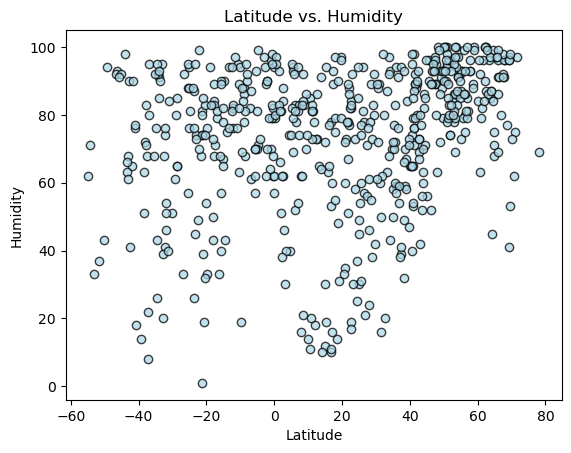

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],facecolors ="lightblue",edgecolors="black", alpha=0.75 )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs. Temperature")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

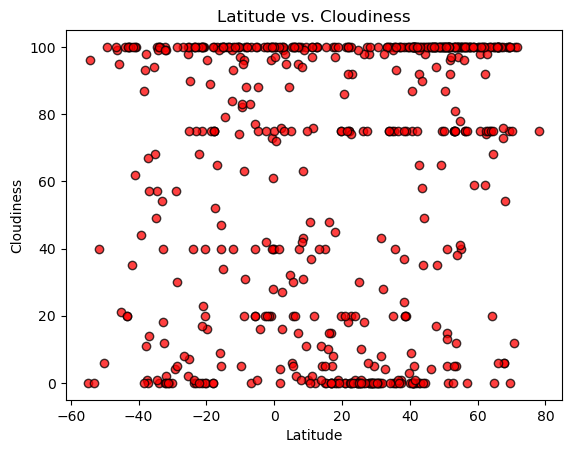

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],facecolors ="red",edgecolors="black", alpha=0.75 )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Temperature")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

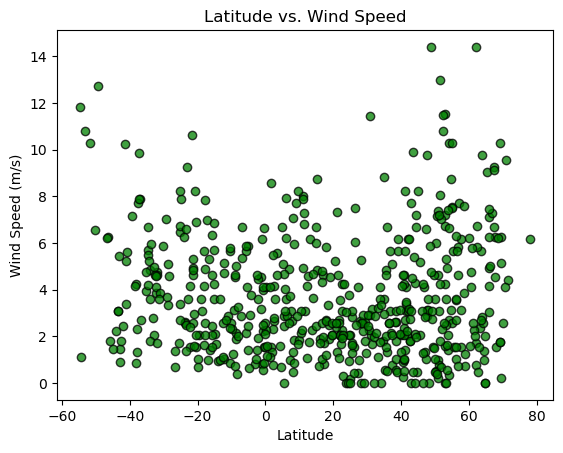

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],facecolors ="green",edgecolors ="black", alpha=0.75 )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Latitude vs. Temperature")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
#Your code here

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude > 0)
northern_hemi_df =city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,albany,42.6001,-73.9662,278.80,73,65,1.79,US,1703961331
7,tangalle,6.0240,80.7911,298.24,83,100,6.20,LK,1703961907
10,stanley,54.8680,-1.6985,281.92,92,100,8.73,GB,1703961314
11,bilibino,68.0546,166.4372,235.63,96,54,1.54,RU,1703961355
14,iskateley,67.6803,53.1512,253.72,91,6,6.26,RU,1703961360


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df[city_data_df["Lat"]<= 0]

# Display sample data
sothern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.30,94,100,12.74,TF,1703961313
1,san juan de miraflores,-12.1629,-76.9635,298.44,76,100,4.70,PE,1703961904
2,blackmans bay,-43.0167,147.3167,285.22,68,100,0.89,AU,1703961314
4,ancud,-41.8697,-73.8203,289.93,65,35,2.46,CL,1703961456
5,puerto natales,-51.7236,-72.4875,293.40,37,40,10.29,CL,1703961318


###  Temperature vs. Latitude Linear Regression Plot

In [56]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
linregress(x_values, y_values)
#regress_values = x_values *slope +intercept
#line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.scatter(x_values, y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15, color="blue")

#plt.xlabel("Latitude")
#plt.ylabel("Max Temperature")
                      
#print(f"R squared{rvalue**2}")
#plt.show()
                     
           

LinregressResult(slope=-0.7288371321888366, intercept=307.2880598177423, rvalue=-0.8582351601294431, pvalue=5.042230216640768e-115, stderr=0.02207122747586407, intercept_stderr=0.9200608489434108)

R squared0.7365675900824109


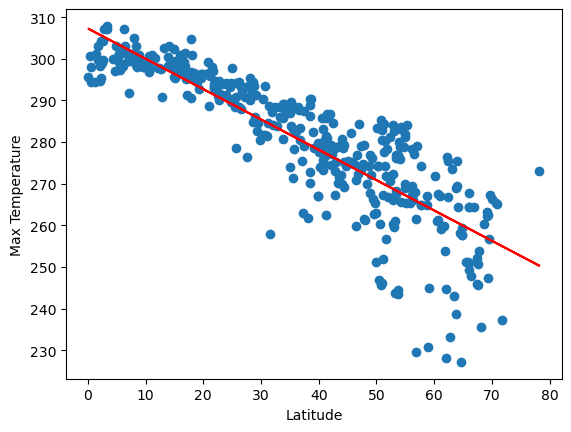

In [76]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15, color="blue")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
                      
print(f"R squared{rvalue**2}")
plt.show()
             

In [68]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
linregress(x_values, y_values)


LinregressResult(slope=0.2612061935030922, intercept=302.8584555713597, rvalue=0.6143568996035014, pvalue=2.2594489420623732e-20, stderr=0.024935380680665652, intercept_stderr=0.6415549433564348)

R squared0.37743440009042667


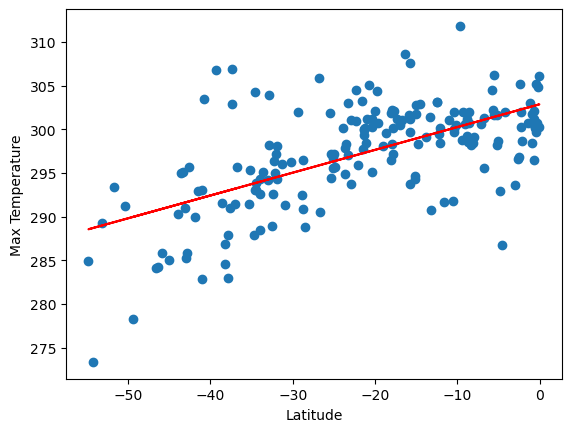

In [86]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
                      
print(f"R squared{rvalue**2}")
plt.show()

###### **Discussion about the linear relationship:**  In terms of correlation, the Northern Hemisphere exhibited a negative relationship, while the Southern Hemisphere displayed a stronger positive correlation. The temperature in the Northern Hemisphere had a correlation coefficient of 0.73, whereas the Southern Hemisphere had a correlation coefficient of 0.377, indicating a difference of 0.4676 in the slope between the two hemispheres.

### Humidity vs. Latitude Linear Regression Plot

In [79]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
linregress(x_values, y_values)
#regress_values = x_values * slope +intercept
#line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.scatter(x_values, y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15,30),fontsize=15, color="red")

#plt.xlabel("Latitude")
#plt.ylabel("Humidity")
                      
#print(f"R squared{rvalue**2}")
#plt.show()

LinregressResult(slope=0.4241132233688049, intercept=59.260682406351805, rvalue=0.3857008637511345, pvalue=2.3625767875724395e-15, stderr=0.05137165942711676, intercept_stderr=2.1414782044103067)

R squared0.14876515629837123


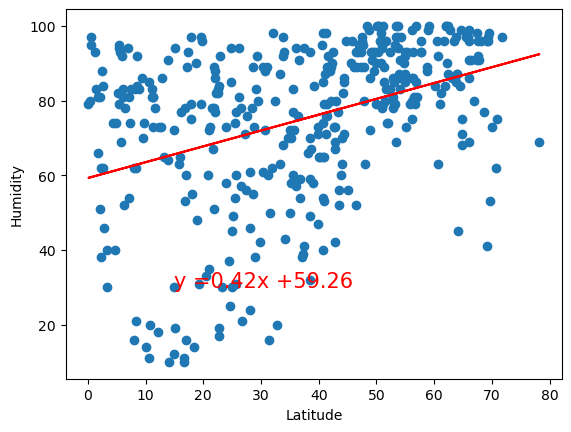

In [81]:
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
#inregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
                      
print(f"R squared{rvalue**2}")
plt.show()

In [82]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
linregress(x_values, y_values)
#regress_values = x_values * slope +intercept
#line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.scatter(x_values, y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15,30),fontsize=15, color="blue")

#plt.xlabel("Latitude")
#plt.ylabel("Humidity")
                      
#print(f"R squared{rvalue**2}")
#plt.show()

LinregressResult(slope=0.34105943572422925, intercept=78.83640722478077, rvalue=0.22735760452318152, pvalue=0.001966803935196727, stderr=0.10858157154879644, intercept_stderr=2.7936627427771508)

R squared0.05169148033451941


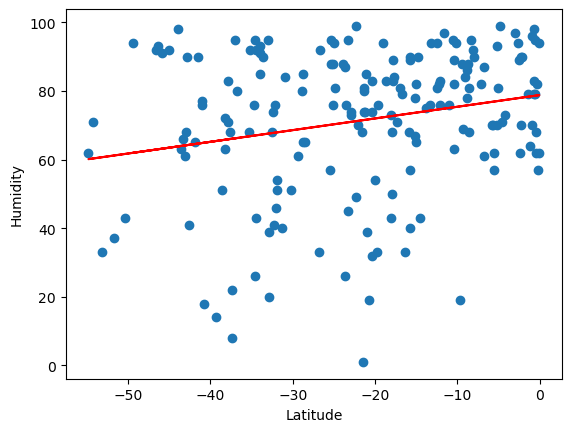

In [85]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
                      
print(f"R squared{rvalue**2}")
plt.show()

###### **Discussion about the linear relationship:** The outcomes of humidity in both the Southern and Northern hemispheres are comparable. The positive correlations indicate that the slope values are nearly identical, with the Southern hemisphere having a slight margin of .2986. The standard deviations are only 0.135 apart from each other. Overall, when it comes to humidity, these two hemispheres exhibit striking similarities.

### Cloudiness vs. Latitude Linear Regression Plot

In [87]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
linregress(x_values, y_values)


LinregressResult(slope=0.34495000646491947, intercept=69.41193034310542, rvalue=0.12388626916459856, pvalue=0.09474899482502161, stderr=0.20536911032768254, intercept_stderr=5.2838803477982665)

R squared0.015347807687523364


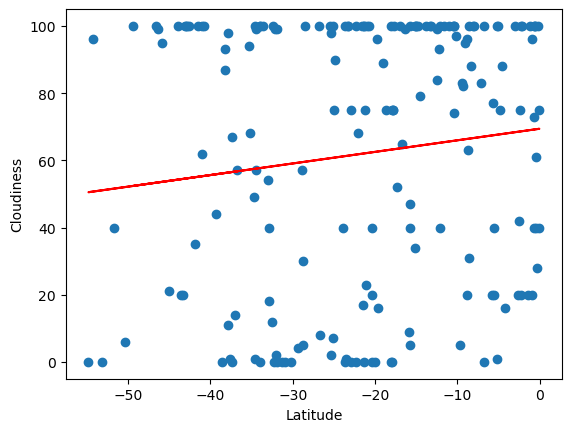

In [95]:
# Sorthern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
#inregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
                      
print(f"R squared{rvalue**2}")
plt.show()

In [93]:
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.6246824164976994, intercept=38.330806902312645, rvalue=0.28929639849801164, pvalue=5.388309324782393e-09, stderr=0.10466575099462272, intercept_stderr=4.363094885443937)

R squared0.08369240618392035


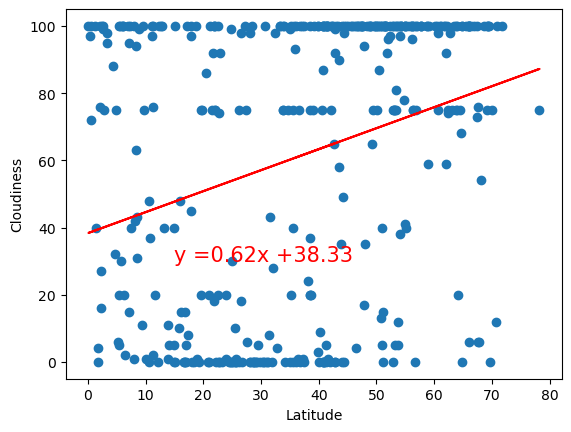

In [94]:
# Nouthern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
#inregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
                      
print(f"R squared{rvalue**2}")
plt.show()

###### **Discussion about the linear relationship:** The southern hemi has more a stead slope with higher standard devaition outside its slope. Whereas then the northern hemi has more of a normal positive gradual slope, but again it too has a higher number of outliers outside it standard devation line. 
 

### Wind Speed vs. Latitude Linear Regression Plot

In [96]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.022491916674919194, intercept=2.7206223794242264, rvalue=0.1648159997186154, pvalue=0.0010558900355724732, stderr=0.006815763932118842, intercept_stderr=0.2841218303984537)

R squared0.027164313763246635


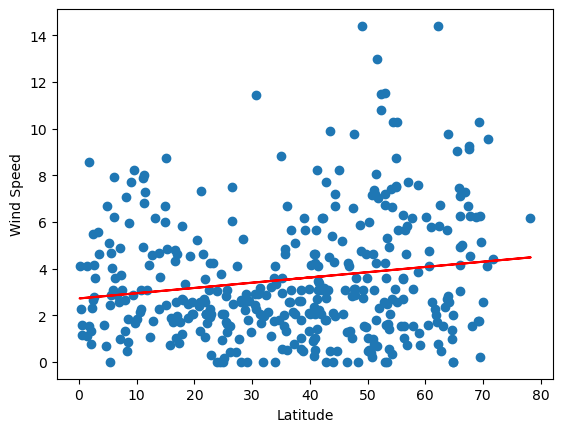

In [98]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
#inregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
                      
print(f"R squared{rvalue**2}")
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
linregress(x_values, y_values)

R squared0.11315497213577859


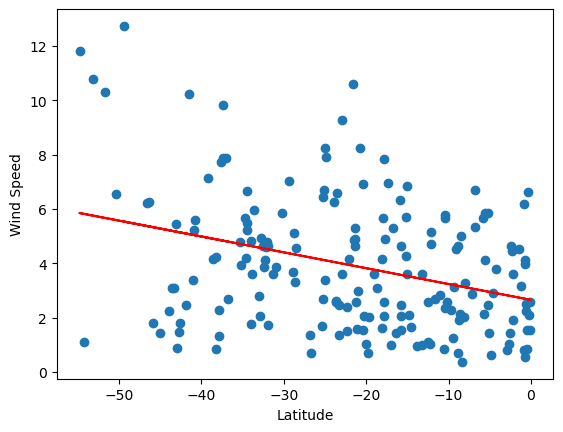

In [101]:
# Sorthern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
#inregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,30),fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
                      
print(f"R squared{rvalue**2}")
plt.show()

###### **Discussion about the linear relationship:** The corraltion are very close in class we would consider this these as having no correlation. 